# Titanic ML Classification
This notebook demonstrates machine learning on the Titanic dataset. We'll preprocess the data, train models, compare them, and visualize results.


In [1]:
%matplotlib inline

import plotly.io as pio
pio.renderers.default = "svg"


In [2]:
import sys
sys.path.append('../src')

In [3]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

# Custom functions
from model import train_and_evaluate
from visualize import plot_confusion
from metrics import classification_metrics


### Load Dataset
We load the Titanic dataset and inspect the first few rows.

In [4]:
data = pd.read_csv(r'C:\Users\Rubah\OneDrive\سطح المكتب\MLmodels\data\Titanicdata.csv')

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Preprocessing
- Fill missing values
- Encode categorical variables
- Drop unnecessary columns


In [7]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [8]:
data = data.drop(['Cabin'], axis=1)

In [9]:
data.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
data.replace({'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

C:\Users\Rubah\AppData\Local\Temp\ipykernel_20204\2983027213.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Rubah\AppData\Local\Temp\ipykernel_20204\2983027213.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [10]:
FEATURE_COLS = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
TARGET = ['Survived']

In [11]:
X = data[FEATURE_COLS]
y = data[TARGET]

### Model Comparison
We train multiple classification models using the same pipeline and compare their performance.


In [12]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Baseline (Most Frequent)": DummyClassifier(strategy="most_frequent")
}


Training Logistic Regression...


c:\Users\Rubah\OneDrive\سطح المكتب\MLmodels\venv\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



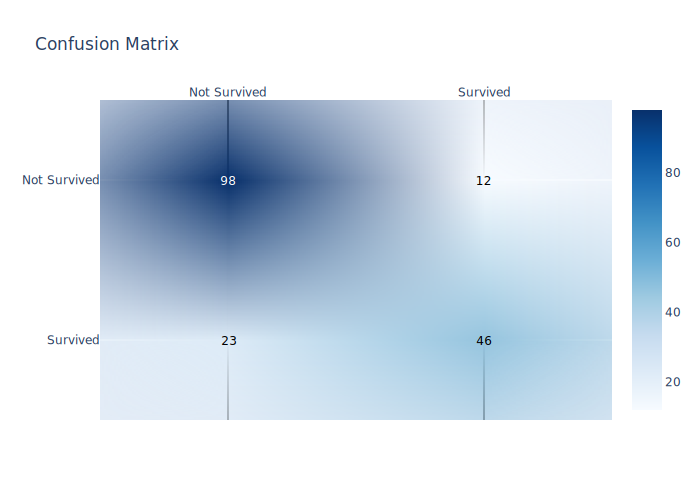


Training Random Forest...


c:\Users\Rubah\OneDrive\سطح المكتب\MLmodels\venv\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



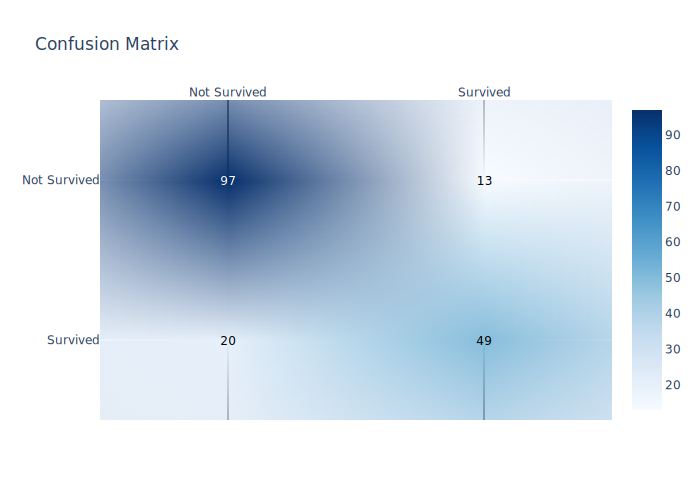


Training SVM...


c:\Users\Rubah\OneDrive\سطح المكتب\MLmodels\venv\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



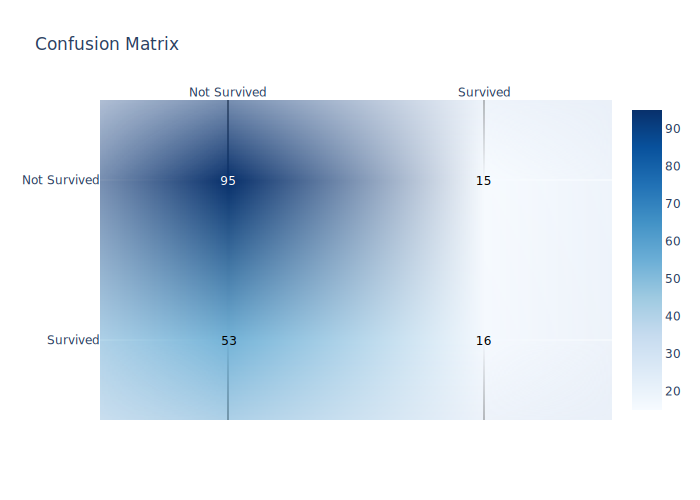


Training Baseline (Most Frequent)...


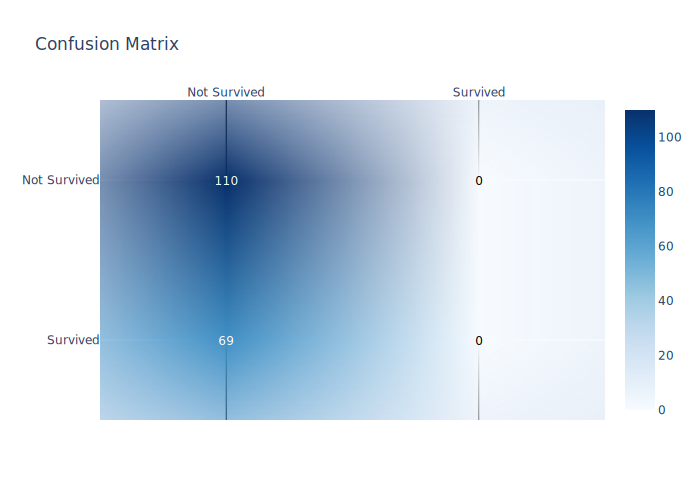

In [13]:
metrics_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    metrics = train_and_evaluate(
        model,
        X,
        y,
        task="classification",
        labels=[0, 1],
        class_names=["Not Survived", "Survived"],
        plot=True
    )
    
    metrics_results[name] = metrics


In [14]:
metrics = pd.DataFrame(metrics_results)

In [15]:
metrics

,Logistic Regression,Random Forest,SVM,Baseline (Most Frequent)
Accuracy,0.804469,0.815642,0.620112,0.614525
Precision,0.803436,0.814128,0.593413,0.377641
Recall,0.804469,0.815642,0.620112,0.614525
F1 Score,0.800657,0.813559,0.575909,0.467805


In [16]:
import os
from joblib import dump

os.makedirs("models", exist_ok=True)

best_model_name = 'Random Forest'
best_model = models[best_model_name]
best_model_name = 'Random Forest_Titanic'
model_path = f"models/{best_model_name.replace(' ', '_')}.joblib"
dump(best_model, model_path)

print(f"Saved {best_model_name} as '{model_path}'")

Saved Random Forest_Titanic as 'models/Random_Forest_Titanic.joblib'
